#### Recreate Figure 2 in Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
import gizmo_analysis as gizmo

In [2]:
# setting matplotlib parameters to make plots look more nicer
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (8, 7.5)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 0.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 15.0
plt.rcParams['ytick.major.size'] = 15.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### function to be used for the 3rd panel

In [3]:
def metallicity_modifier(alpha, metfrac, cap):
    '''                                                                                                                                                                                                     
    A metallicity-dependent modification is made                                                                                                                                                            
    to the absolute 1a rate, defined be a metal mass fraction power law                                                                                                                                     
                                                                                                                                                                                                            
    the raw 1a rate for each particle is multiplied by a metal mass                                                                                                                                         
    fraction power law term, normalised by solar metal mass fraction                                                                                                                                        
    from Asplund et al 2009, ie normalised by Z_sol = 0.0134 as per                                                                                                                                         
    Table 4 in Asplund et al 2009                                                                                                                                                                           
    '''

    modifier_temp = ((metfrac/0.0134)**(-alpha))
    modifier = np.where(modifier_temp>=cap, cap, modifier_temp)

    return modifier

#### preliminary handling of values for plotting

In [4]:
# array of stellar age values in Myr                                                                                                                                                                        
age = np.logspace(0, 4, num=1000)
# array of metal mass fraction values and corresponding metallicities                                                                                                                                       
metfrac = np.logspace(-7, 0, num=100)
metallicity = np.log10(np.divide(metfrac,0.0134))

In [5]:
# instantiating objects of supernova ia and ii classes                                                                                                                                                      
snia = gizmo.star.SupernovaIaClass()
snii = gizmo.star.SupernovaCCClass()

# computing values for type II supernovae                                                                                                                                                                   
ii_rate = snii.get_rate(age)
ii_num = snii.get_number(age_min=1.0, age_maxs=age)

# computing values for type Ia supernovae (mannucci model)                                                                                                                                                  
ia_rate_mann = snia.get_rate(age, model='fire2')
ia_num_mann = snia.get_number(age_min=1.0, age_maxs=age, model='fire2')

# computing values for type Ia supernovae (maoz model)                                                                                                                                                      
ia_rate_maoz = snia.get_rate(age, model='fire3')
ia_num_maoz = snia.get_number(age_min=1.0, age_maxs=age, model='fire3')

#### plot 2a: specific rate vs stellar age

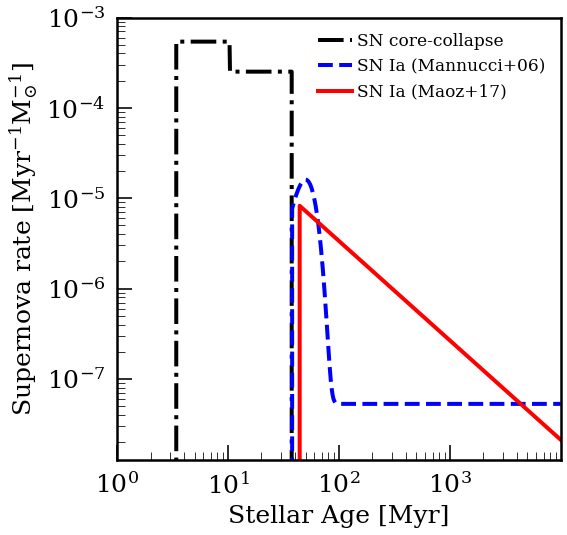

<Figure size 576x540 with 0 Axes>

In [6]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.2, right=0.97, top=0.97, bottom=0.15, wspace=0)

# plotting rates versus age
ax.plot(age, ii_rate, c='k', lw=4, linestyle='dashdot', label='SN core-collapse')
ax.plot(age, ia_rate_mann, c='b', lw=4, linestyle='dashed', label='SN Ia (Mannucci+06)')
ax.plot(age, ia_rate_maoz, c='r', lw=4, linestyle='solid', label='SN Ia (Maoz+17)')

# specifying rest of the plot
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,9999)
ax.set_ylim(10**-7.9, 10**-3)
ax.set_xlabel('Stellar Age [Myr]')
ax.set_ylabel('Supernova rate [$\\rm{Myr}^{-1} \\rm{M}_{\\odot}^{-1}$]')
plt.legend(prop={'size':17}, loc='upper right', ncol=1)
#plt.savefig('/specify/your/desired/path/here.pdf')                                                                                                         
plt.show()                                                                                                                                                                                                 
plt.clf()

#### plot 2b: cumulative number of supernovae vs stellar age 

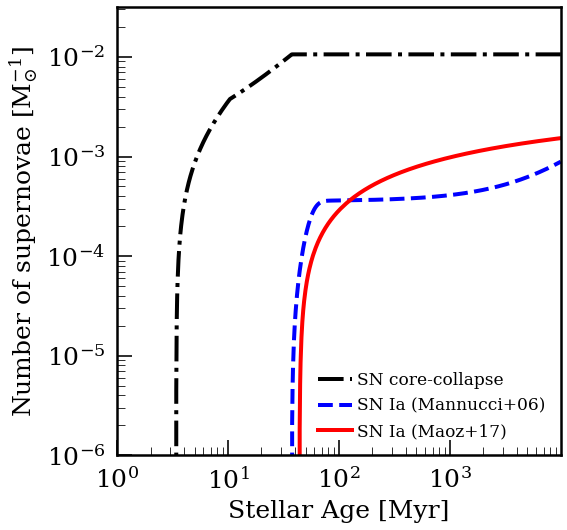

<Figure size 576x540 with 0 Axes>

In [7]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.2, right=0.97, top=0.98, bottom=0.15, wspace=0)

# plotting number vs age
plt.plot(age, ii_num, c='k', lw=4, linestyle='dashdot', label='SN core-collapse')
plt.plot(age, ia_num_mann, c='b', lw=4, linestyle='dashed', label='SN Ia (Mannucci+06)')
plt.plot(age, ia_num_maoz, c='r', lw=4, linestyle='solid', label='SN Ia (Maoz+17)')

# specifying rest of the plot
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,9999)
ax.set_ylim(10**-6, 10**-1.5)
ax.set_xlabel('Stellar Age [Myr]')
ax.set_ylabel('Number of supernovae [$\\rm{M}_{\\odot}^{-1}$]')
plt.legend(prop={'size':17}, loc='lower right', ncol=1)
#plt.savefig('/specify/your/desired/path/here.pdf') 
plt.show()                                                                                                                                                                                                 
plt.clf()

#### plot 2c: metallicity-dependent Ia rate modifier vs metal mass fraction of the stellar population

<ipython-input-3-8ec664f1b10a>:12: RuntimeWarning: invalid value encountered in reciprocal
  modifier_temp = ((metfrac/0.0134)**(-alpha))
<ipython-input-3-8ec664f1b10a>:12: RuntimeWarning: invalid value encountered in reciprocal
  modifier_temp = ((metfrac/0.0134)**(-alpha))


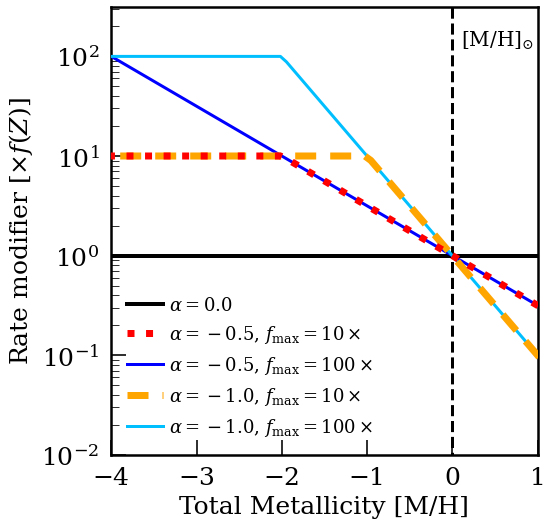

<Figure size 576x540 with 0 Axes>

In [8]:
# initialising figure                                                                                                                                                                                       
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.18, right=0.92, top=0.98, bottom=0.15, wspace=0)

# choosing colours for plotting                                                                                                                                                                             
cmap = plt.cm.get_cmap('viridis')
#colours = [cmap(0.0), cmap(0.33), cmap(0.67), cmap(1.0)]                                                                                                                                                   
colours = ['blue', 'deepskyblue', 'red', 'orange']

# computing & plotting values for unmodified rates                                                                                                                                                          
ax.plot(metallicity, metallicity_modifier(0.0,metfrac,100.0), c='k', lw=4, \
         linestyle='solid', alpha=1, label='$\\alpha=0.0$')

# computing and plotting values for alpha=0.5, rate caps=10x and 100x                                                                                                                                       
ax.plot(metallicity, metallicity_modifier(0.5,metfrac,10.0), c=colours[2], lw=7, \
         linestyle='dotted', alpha=1, zorder=1000000000, label='$\\alpha=-0.5$, $f_{\\rm max}=10\\times$')
ax.plot(metallicity, metallicity_modifier(0.5,metfrac,100.0), c=colours[0], lw=3, \
         linestyle='solid', alpha=1, zorder=100000, label='$\\alpha=-0.5$, $f_{\\rm max}=100\\times$')

# computing and plotting values for alpha=1.0, rate caps=10x and 100x                                                                                                                                       
ax.plot(metallicity, metallicity_modifier(1.0,metfrac,10.0), c=colours[3], lw=7, \
         linestyle='dashed', dashes=(3,2), alpha=1, zorder=500000, \
        label='$\\alpha=-1.0$, $f_{\\rm max}=10\\times$')
ax.plot(metallicity, metallicity_modifier(1.0,metfrac,100.0), c=colours[1], lw=3, \
         linestyle='solid', alpha=1, zorder=100000, label='$\\alpha=-1.0$, $f_{\\rm max}=100\\times$')

# plotting solar metal mass fraction as reference                                                                                                                                                           
ax.plot([0.0,0.0], [10**-7,10**4], c='k', lw=3, linestyle='dashed', alpha=1)
ax.annotate('$\\rm{[M/H]}_{\\odot}$', (0.1,10**2.1), fontsize=20)

# specifying rest of the plot                                                                                                                                                                               
ax.set_yscale('log')
ax.set_xlim(-4, 1)
ax.set_ylim(10**-2, 10**2.5)
ax.set_xlabel('Total Metallicity [M/H]')
ax.set_ylabel('Rate modifier [$\\times f(Z)$]')
plt.legend(prop={'size':18}, loc='lower left', ncol=1)
#plt.savefig('/specify/your/desired/path/here.pdf') 
plt.show()    
plt.clf()